In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pwd

In [8]:
train_data  =pd.read_csv('train.csv') 

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [14]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train_data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [18]:
## Now since we have missing values in our dataset for age and cabin column , I would try to see the distribution of age 

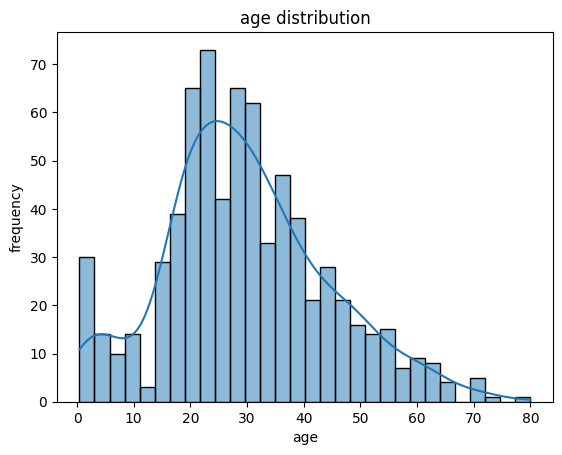

In [24]:
sns.histplot(train_data['Age'].dropna(),kde=True,bins=30)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

In [ ]:
###From the above plot the age distribution had a longer tail on the right hand side basically towards the older ages ,beyond 60-70 which suggests postive skewness bcz most passangers are clustered around younger ages (20,30) and fewer in the older range 

In [27]:
skewness = train_data['Age'].skew()
skewness

0.38910778230082704

as per 
Skewness near 0: Symmetrical distribution.
Positive skewness (>0): Right-skewed.
Negative skewness (<0): Left-skewed.
we got 0.39 indicates that the Age distribution is slightly positively skewed.

In [30]:
##so now for age column I would fill the missing values by median and it won't affect the median also 
##I would apply the same transformation to the test data column of age which is best practice

In [31]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)

/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_25565/600431010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_25565/600431010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [32]:
## Now I would handle the cabin column but since 77% of data is missing I would try to drop that column , We can also try doing 
## multiple approaches like creating binary feature , extracting first letter of cabin and many more


In [33]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [34]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [35]:
#I would see whats still left in embarked column 
train_data['Embarked'].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

## since from the above execution
Embarked 'S' (Southampton): 72.44% (most frequent value).
Embarked 'C' (Cherbourg): 18.90%.
Embarked 'Q' (Queenstown): 8.66%

S is the most frequent value so I would fill missing values in embarked column as S to maintain the consistency and avoid bias 

In [37]:
train_data['Embarked'].fillna('S',inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

Since I am going  to train ml model I would convert Embarked in to numerical column 

In [38]:
embarked_mapping ={'S':0,'C':1,'Q':2}
train_data['Embarked']=train_data['Embarked'].map(embarked_mapping)
test_data['Embarked']=test_data['Embarked'].map(embarked_mapping)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [40]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [43]:
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})
test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})

# now will try building our ml model if we get good score we will try to keep it in the same way but in case required Will do feature engineering 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [46]:
X= train_data.drop('Survived',axis=1)
y= train_data['Survived']

In [48]:
# splitting the data in training and test sets 
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=123)

In [50]:
print(X_train.dtypes)


PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object


In [51]:
X_train.drop(['Name', 'Ticket'], axis=1, inplace=True)
X_val.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [52]:
# training the model 
model = RandomForestClassifier(n_estimators=100,random_state=123)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [53]:
# validating the model 
y_pred = model.predict(X_val)


In [54]:
accuracy_score(y_val,y_pred)

0.8379888268156425

## now will check feature importance 

In [56]:
feature_imp = model.feature_importances_
feature_names = X_train.columns

feature_imp_data = pd.DataFrame({'Feature':feature_names,'Importance':feature_names})

print(feature_imp_data.sort_values(by='Importance',ascending=False))

       Feature   Importance
4        SibSp        SibSp
2          Sex          Sex
1       Pclass       Pclass
0  PassengerId  PassengerId
5        Parch        Parch
6         Fare         Fare
7     Embarked     Embarked
3          Age          Age



Rank	Feature	Importance
1️⃣	SibSp	🚀 Most important
2️⃣	Sex	✅ High importance
3️⃣	Pclass	✅ Important
4️⃣	PassengerId	❌ Not useful (should be dropped)
5️⃣	Parch	✅ Might be useful
6️⃣	Fare	✅ Important
7️⃣	Embarked	⚠️ Low importance?
8️⃣	Age	⚠️ Surprisingly low impact?

In [57]:
## Now running trained model to test model 

test_predictions = model.predict(test_data)

In [58]:
test_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
test_original =pd.read_csv('test.csv')
# Create the submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_original["PassengerId"],  # Ensure correct IDs
    "Survived": test_predictions  # Your model's predictions
})

# Save as CSV file (without index)
submission.to_csv("submission.csv", index=False)

print("✅ Submission file created: submission.csv")

✅ Submission file created: submission.csv
